## What are Tensors?

In [5]:
%matplotlib inline
import torch
import numpy as np

In [6]:
#created data directly from data 
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [7]:
#Tensors and NP share same memory address when you tell them to

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out= np_array)

print(f"Numpy np_array after * 2 operations: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operations: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



In [8]:
#first line makes an array of ones 
x_ones = torch.ones_like(x_data) #retains properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

#randomizes in the same arr space 
x_rand = torch.rand_like(x_data, dtype=torch.float) #overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6158, 0.7247],
        [0.3640, 0.9249]]) 



In [9]:
#makes different types of tensors with the same shape

shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor  = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
#print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5549, 0.7276, 0.8647],
        [0.2712, 0.3799, 0.6636]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 



In [10]:
#displays information about the tensor

tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tenor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tenor: torch.float32
Device tensor is stored on: cpu


In [11]:
#Trying to move to CUDA 
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
if tensor.device == 'cuda':
    print("Congrats! You have cuda!")
else:
    print(f"Device tensor is stored on: {tensor.device}...nice try though")

Device tensor is stored on: cpu...nice try though


In [12]:
#numpy-like indexing and slicing

tensor = torch.ones(4, 4)
print('First row:', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:, 1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
#torch.cat concatenates, torch.stack joins in new dimension

t1 = torch.cat([tensor, tensor, tensor], dim= 1)
print(t1)
print(f'\n')
t2 = torch.stack((t1, torch.rand(4, 12)))
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


tensor([[[1.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000, 1.0000,
          1.0000, 0.0000, 1.0000, 1.0000],
         [1.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000, 1.0000,
          1.0000, 0.0000, 1.0000, 1.0000],
         [1.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000, 1.0000,
          1.0000, 0.0000, 1.0000, 1.0000],
         [1.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.0000, 1.0000, 1.0000,
          1.0000, 0.0000, 1.0000, 1.0000]],

        [[0.2698, 0.9234, 0.4556, 0.3567, 0.0654, 0.9186, 0.3638, 0.2946,
          0.6148, 0.1557, 0.6704, 0.4572],
         [0.7945, 0.3339, 0.6301, 0.4802, 0.2068, 0.5387, 0.5218, 0.7434,
          0.7248, 0.7502, 0.4696, 0.9733],
         [0.0707, 0.7180, 0.1242, 0.7542, 0.3979, 0.1657, 0.0

In [14]:
# Matrix multiplication 

#transposes the tensor
#[[1, 2, 3] [4, 5, 6], [7, 8, 9]] becomes [[1, 4, 7]. [2, 5, 6], [3, 6, 9]]

y1 = tensor @ tensor.T

y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

#Computes the element-wise product

z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)


#I'm honestly not sure what the tutorial was trying
#to accomplish

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [15]:
#aggregates values into one tensor

agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [16]:
#Don't do this

print(tensor, "\n")
tensor.add_(5) #adds in place (BAD) but fast
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [17]:
#Tensors on the CPU and NP arrays can share memory locations
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [18]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [19]:
#NP array to tensor

n = np.ones(5)
t = torch.from_numpy(n)

In [20]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Loading and normalizing datasets

In [22]:
#sets everything up
#training data is already known
#test data has not been trained

%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



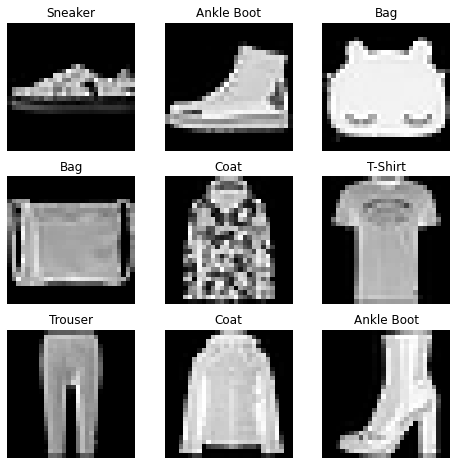

In [30]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

#lists the things from the training data
figure = plt.figure(figsize =(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [32]:
from torch.utils.data import DataLoader

#shuffle
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


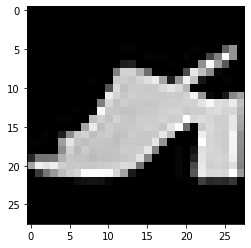

Label: Sandal


In [36]:
#Display image and label 

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
label_name = list(labels_map.values())[label]
print(f"Label: {label_name}")

## Neural Network

In [39]:
%matplotlib inline
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [41]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [47]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            #first input layer is 28x28
            nn.Linear(28*28, 512),
            #ReLU activation
            #AKA rectified linear activation function 
            #AKAAKA makes things either 0 or positive
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [49]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
  )
)


In [51]:
X = torch.rand(1, 28, 28, device = device )
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([55])


In [53]:
#nn.Linear module randomly inits the weights and bias for each layer
#and internally stores the values in Tensors

print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")
print(f"First Linear biases: {model.linear_relu_stack[0].bias} \n ")

First Linear weights: Parameter containing:
tensor([[ 1.0338e-02, -1.1956e-02, -2.9492e-05,  ..., -2.5474e-02,
         -1.0354e-02,  2.2475e-02],
        [-2.6487e-02, -2.7928e-02,  1.2682e-02,  ..., -2.4515e-02,
          3.5680e-02,  8.6003e-03],
        [-4.2739e-04,  1.4339e-02,  2.2475e-02,  ..., -2.4439e-02,
          2.4710e-02, -1.8112e-02],
        ...,
        [-2.5734e-02,  3.2784e-02,  4.4933e-03,  ...,  1.5198e-02,
         -7.5404e-03,  2.2286e-02],
        [-3.1251e-02, -3.2747e-02, -3.2712e-02,  ...,  2.5230e-02,
         -1.2233e-02,  3.1318e-02],
        [-1.7011e-02,  3.1351e-02,  2.4173e-02,  ...,  2.3219e-02,
         -3.2210e-03, -1.1448e-02]], requires_grad=True) 

First Linear biases: Parameter containing:
tensor([ 1.5640e-02, -3.2947e-02,  2.0174e-02, -2.9439e-02, -3.5209e-02,
         2.2723e-02, -2.6893e-02, -2.9579e-02, -1.1997e-02, -2.3149e-02,
         5.5825e-03,  3.4269e-02,  1.5609e-02,  3.3275e-03, -1.0903e-02,
         2.5471e-02,  3.3622e-02, -3.458

In [57]:
#takes 3 images of FashionMNIST
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [59]:
#converts each 2D 28x28 array into a continous array of 784 pixels 

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [61]:
#Transformation calculation
##weight * input + bias

#Applies linear transformation on the input using its stored weigths and biases
#greyscale is connected to neurons in the hidden layer

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [63]:
#does ReLU stuff

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[0.3748, 0.0000, 0.0000, 0.0000, 0.0000, 0.6097, 0.0000, 0.0000, 0.2766,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1121, 0.0126, 0.0000, 0.1395,
         0.0000, 0.0789],
        [0.3658, 0.0000, 0.0000, 0.0000, 0.0000, 0.5254, 0.0000, 0.0072, 0.4443,
         0.0000, 0.2244, 0.1711, 0.0000, 0.0000, 0.0000, 0.3610, 0.0307, 0.0000,
         0.0000, 0.0586],
        [0.1996, 0.0000, 0.0000, 0.0000, 0.0000, 0.8078, 0.0000, 0.0000, 0.3890,
         0.0000, 0.3736, 0.0000, 0.0405, 0.0000, 0.0000, 0.2496, 0.0980, 0.0000,
         0.0381, 0.2717]], grad_fn=<ReluBackward0>)


After ReLU: tensor([[0.3748, 0.0000, 0.0000, 0.0000, 0.0000, 0.6097, 0.0000, 0.0000, 0.2766,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1121, 0.0126, 0.0000, 0.1395,
         0.0000, 0.0789],
        [0.3658, 0.0000, 0.0000, 0.0000, 0.0000, 0.5254, 0.0000, 0.0072, 0.4443,
         0.0000, 0.2244, 0.1711, 0.0000, 0.0000, 0.0000, 0.3610, 0.0307, 0.0000,
         0.0000, 0.0586],
       

In [65]:
#creates an ordered container of modules


seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [67]:
#taxes relative max and makes it 1
#makes everything relative to that between 0 and 1

softmax = nn.Softmax(dim = 1)
pred_probab = softmax(logits)

In [69]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 1.0338e-02, -1.1956e-02, -2.9492e-05,  ..., -2.5474e-02,
         -1.0354e-02,  2.2475e-02],
        [-2.6487e-02, -2.7928e-02,  1.2682e-02,  ..., -2.4515e-02,
          3.5680e-02,  8.6003e-03]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0156, -0.0329], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0315, -0.0344, -0.0415,  ...,  0.0161,  0.0106,  0.0030],
        [ 0.0440, -0.0178, -0.0313,  ...,  0.0197, -0.0194,  0.0368]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

## Automatic differentiation

In [21]:
%matplotlib inline
import torch

x = torch.ones(5) #input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w)+b
#measures the difference between predicted binary outcomes
#and actual binary labels
#penalizes predictions that are confident but wrong
# =(y*log(p) + (1 - y)* log(1 -p))
##where p is the probability of 1 
##and y is the actuall class 
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) 

In [23]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

#gradients minimize error between predicted and acutal results

Gradient function for z = <AddBackward0 object at 0x7fa1ccd61d20>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fa1ccd624d0>


In [24]:
#gradLoss/gradw 
#gradLoss/gradb
#This can only be done with leaf nodes that have
#required_graph property set to true

loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1530, 0.0356, 0.3256],
        [0.1530, 0.0356, 0.3256],
        [0.1530, 0.0356, 0.3256],
        [0.1530, 0.0356, 0.3256],
        [0.1530, 0.0356, 0.3256]])
tensor([0.1530, 0.0356, 0.3256])


In [27]:
#If we just want to do forward computations
#we can disable gradient tracking

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [29]:
#Same thing but with a different function

z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


## Optimizing the model parameters

In [32]:
#already wrote this 

%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [38]:
#learning rate finds the best weights
##closer to zero means longer, more accurate weights
##higher steps means faster and less accurate

#Batch size is the number of data samples seen in each epoch

#Epochs are the number of times the entire dataset is 
#passed through the network

learning_rate = 1e-3
batch_size = 64
epochs = 5

In [40]:
#Inits the loss function
    #measures tghe degree of dissimilarity of an obtained result
    #to the target value
    #We want to minimize this 
    
#to calculate loss we make a prediction using the inputs of our
#given data sample and compare it against the true data label value

loss_fn = nn.CrossEntropyLoss()

In [42]:
#adjusts model parameters to reduce model error in each training step
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#INSIDE:
    #Calls optimizer.zero_grad() to reset the gradients of the model parameters
            #This is to prevent double counting
    #Back-propagates the prediction loss with loss.backwards() 
    
    #Cals optimizer.step() to adjust the parameters by the gradients collected in the backward pass

In [44]:
## Full implementation:

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        #computer prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        #Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
            
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100 *correct):0.1f}%, Avg loss: {test_loss:>8f} \n")

In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n ----------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("done")

Epoch 1
 ----------------------------
loss: 2.306163 [    0/60000]
loss: 2.300706 [ 6400/60000]
loss: 2.291264 [12800/60000]
loss: 2.281506 [19200/60000]
loss: 2.264656 [25600/60000]
loss: 2.262156 [32000/60000]
loss: 2.273452 [38400/60000]
loss: 2.259865 [44800/60000]
loss: 2.261069 [51200/60000]
loss: 2.229286 [57600/60000]
Test Error: 
 Accuracy: 42.0%, Avg loss: 0.035021 

Epoch 2
 ----------------------------
loss: 2.263215 [    0/60000]
loss: 2.235175 [ 6400/60000]
loss: 2.212063 [12800/60000]
loss: 2.209132 [19200/60000]
loss: 2.152148 [25600/60000]
loss: 2.162263 [32000/60000]
loss: 2.192261 [38400/60000]
loss: 2.158315 [44800/60000]
loss: 2.162209 [51200/60000]
loss: 2.117159 [57600/60000]
Test Error: 
 Accuracy: 45.8%, Avg loss: 0.032996 

Epoch 3
 ----------------------------
loss: 2.152061 [    0/60000]
loss: 2.092113 [ 6400/60000]
loss: 2.035079 [12800/60000]
loss: 2.065351 [19200/60000]
loss: 1.959420 [25600/60000]
loss: 1.990680 [32000/60000]
loss: 2.052766 [38400/60000]

In [46]:
#saving a model

torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Loading a model

In [48]:
%matplotlib inline
import torch
import onnxruntime
from torch import nn
import torch.onnx as onnx
import torchvision.models as models
from torchvision import datasets
from torchvision.transforms import ToTensor

In [49]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [50]:
#loads the model

model = NeuralNetwork()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [53]:
#EXPORTING MODEL TO ONNX
    #Helps to trian and accelerate inference on any hardware, cloud, or edge device
    #Supports java, JS, C#, and ML.NET
    
input_image = torch.zeros((1, 28, 28))
onnx_model = 'data/model.onnx'
onnx.export(model, input_image, onnx_model)

In [55]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

In [58]:
#create an inference session 

session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Precited: "{predicted}", Actual: "{actual}"')

Precited: "Ankle boot", Actual: "Ankle boot"
